In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('data_FraudDetection_JAR2020.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

In [11]:
df.columns

Index(['fyear', 'gvkey', 'p_aaer', 'misstate', 'act', 'ap', 'at', 'ceq', 'che',
       'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao',
       'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect', 'sale',
       'sstk', 'txp', 'txt', 'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec',
       'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm',
       'dpi', 'reoa', 'EBIT', 'ch_fcf'],
      dtype='object')

In [24]:
df = df[(df['fyear']>= 1991) & (df['fyear']<= 2008)]
df.isna().sum()

fyear               0
gvkey               0
p_aaer         107562
misstate            0
act                 0
ap                  0
at                  0
ceq                 0
che                 0
cogs                0
csho                0
dlc                 0
dltis               0
dltt                0
dp                  0
ib                  0
invt                0
ivao                0
ivst                0
lct                 0
lt                  0
ni                  0
ppegt               0
pstk                0
re                  0
rect                0
sale                0
sstk                0
txp                 0
txt                 0
xint                0
prcc_f              0
dch_wc           3185
ch_rsst          3244
dch_rec          3115
dch_inv          3058
soft_assets       391
ch_cs           11268
ch_cm           12109
ch_roa           9253
issue               0
bm                 15
dpi              5931
reoa              390
EBIT              390
ch_fcf    

There are missing financial ratios

In [25]:
df.shape

(108399, 46)

# Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [41]:
# Recode all the fraudulent years in the training period to zero for those cases of serial fraud that span both the training and test sets. 
for index, row in train.iterrows():
    if row['p_aaer'] in test['p_aaer'].values:
        train.at[index, 'misstate'] = 0


# Get predictors, target

In [54]:
# We add fyear and raw fiancial data as predictors
raw = ['fyear', 'act', 'ap', 'at', 'ceq', 'che',
       'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao',
       'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect', 'sale',
       'sstk', 'txp', 'txt', 'xint', 'prcc_f']
# We add fyear and fiancial ratios as predictors
ratio = ['fyear', 'dch_wc', 'ch_rsst', 'dch_rec',
       'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm',
       'dpi', 'reoa', 'EBIT', 'ch_fcf']

X_train_raw = train[raw]
X_test_raw = test[raw]

X_train_ratio = train[ratio]
X_test_ratio = test[ratio]

y_train = train['misstate']
y_test = test['misstate']

y_train_raw = train['misstate']
y_test_raw = test['misstate']

# Handle missing values

In [55]:
X_train_ratio.isna().sum()

fyear             0
dch_wc         2527
ch_rsst        2576
dch_rec        2474
dch_inv        2427
soft_assets     307
ch_cs          9062
ch_cm          9735
ch_roa         7423
issue             0
bm               12
dpi            4732
reoa            306
EBIT            306
ch_fcf         2970
dtype: int64

In [56]:
from sklearn.impute import KNNImputer

cols_to_impute = ['dch_wc', 'ch_rsst', 'dch_rec',
       'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'bm',
       'dpi', 'reoa', 'EBIT', 'ch_fcf']

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Iterate over each column to impute
for col in cols_to_impute:
    
    # Perform imputation
    imputed_train = imputer.fit_transform(X_train_ratio[[col]])
    imputed_test = imputer.transform(X_test_ratio[[col]])
    
    # Replace the original column with the imputed values
    X_train_ratio[col] = imputed_train
    X_test_ratio[col] = imputed_test


/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_66550/2061040635.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_ratio[col] = imputed_train
/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_66550/2061040635.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_ratio[col] = imputed_test
/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_66550/2061040635.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [57]:
X_train_ratio.isna().sum()

fyear          0
dch_wc         0
ch_rsst        0
dch_rec        0
dch_inv        0
soft_assets    0
ch_cs          0
ch_cm          0
ch_roa         0
issue          0
bm             0
dpi            0
reoa           0
EBIT           0
ch_fcf         0
dtype: int64

# Handle imbalanced class

In [58]:
from imblearn.over_sampling import SMOTE
# Oversampling the minority
smote = SMOTE(random_state=42)
X_train_raw, y_train_raw = smote.fit_resample(X_train_raw, y_train_raw)
X_train_ratio, y_train = smote.fit_resample(X_train_ratio, y_train)

# Model 1: Logistic Regression using 14 financial ratios

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ndcg_score

In [61]:
model = LogisticRegression()
model.fit(X_train_ratio, y_train)

y_pred_proba = model.predict_proba(X_test_ratio)[:, 1]  # Probability of positive class
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)


AUC: 0.7188368839540279


In [79]:
# NDCG@k assesses the ability of a fraud prediction model to identify actual fraud by picking the top k observations in a test year that have the highest predicted probability
# of fraud. In our study, we pick a k that equals the top 1% of the observations. We select a cutoff of 1% because typically less than 1% of the firms in a year are fraud per the SEC’s AAERs.
k = round(len(test)*0.01)

# NDCG requires predictions to be ranked, so we need to sort the predictions
sorted_indices = y_pred_proba.argsort()[::-1]  # Sort in descending order
y_true_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred_proba[sorted_indices]

# Calculate NDCG at k
ndcg = ndcg_score([y_true_sorted], [y_pred_sorted], k=k)
print("NDCG@{}:".format(k), ndcg)



NDCG@217: 0.03997161219410606


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict classes
y_pred = model.predict(X_test_ratio)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5859778597785977
Precision: 0.013585155732273028
Recall: 0.7321428571428571
F1 Score: 0.02667534157449577


In [80]:
results = []
result1 = {
    "AUC": auc,
    "NDCG@k": ndcg,
    "Accuracy": accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}
results.append(result1)

# Model 2: SVM using 28 raw financial data

In [82]:
from sklearn.svm import SVC

# Initialize and fit SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_raw, y_train_raw)

# Predict probabilities
y_pred_proba_svm = svm_model.predict_proba(X_test_raw)[:, 1]

# Calculate AUC
auc_svm = roc_auc_score(y_test_raw, y_pred_proba_svm)
print("AUC (SVM):", auc_svm)

# Calculate NDCG at k
sorted_indices_svm = y_pred_proba_svm.argsort()[::-1]
y_true_sorted_svm = y_test_raw.iloc[sorted_indices_svm]
y_pred_sorted_svm = y_pred_proba_svm[sorted_indices_svm]
ndcg_svm = ndcg_score([y_true_sorted_svm], [y_pred_sorted_svm], k=k)
print("NDCG@{} (SVM):".format(k), ndcg_svm)

# Predict classes
y_pred_svm = svm_model.predict(X_test_raw)

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test_raw, y_pred_svm)
precision_svm = precision_score(y_test_raw, y_pred_svm)
recall_svm = recall_score(y_test_raw, y_pred_svm)
f1_svm = f1_score(y_test_raw, y_pred_svm)

# Print performance metrics
print("Accuracy (SVM):", accuracy_svm)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 Score (SVM):", f1_svm)


AUC (SVM): 0.5869794156971081
NDCG@217 (SVM): 0.04725383163930675
Accuracy (SVM): 0.8704335793357934
Precision (SVM): 0.016123122022718945
Recall (SVM): 0.2619047619047619
F1 Score (SVM): 0.03037625129444253


In [83]:
result2 = {
    "AUC": auc_svm,
    "NDCG@k": ndcg_svm,
    "Accuracy": accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm
}
results.append(result2)

# Model 3: Logistic Regression using 28 raw financial data

In [84]:
lr_model = LogisticRegression()
lr_model.fit(X_train_raw, y_train_raw)

# Predict probabilities
y_pred_proba_lr = lr_model.predict_proba(X_test_raw)[:, 1]

# Calculate AUC
auc_lr = roc_auc_score(y_test_raw, y_pred_proba_lr)
print("AUC (Logistic Regression):", auc_lr)

sorted_indices_lr = y_pred_proba_lr.argsort()[::-1]
y_true_sorted_lr = y_test_raw.iloc[sorted_indices_lr]
y_pred_sorted_lr = y_pred_proba_lr[sorted_indices_lr]
ndcg_lr = ndcg_score([y_true_sorted_lr], [y_pred_sorted_lr], k=k)
print("NDCG@{} (Logistic Regression):".format(k), ndcg_lr)

# Predict classes
y_pred_lr = lr_model.predict(X_test_raw)

# Calculate performance metrics
accuracy_lr = accuracy_score(y_test_raw, y_pred_lr)
precision_lr = precision_score(y_test_raw, y_pred_lr)
recall_lr = recall_score(y_test_raw, y_pred_lr)
f1_lr = f1_score(y_test_raw, y_pred_lr)

# Print performance metrics
print("Accuracy (Logistic Regression):", accuracy_lr)
print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)
print("F1 Score (Logistic Regression):", f1_lr)


AUC (Logistic Regression): 0.6219449498840071
NDCG@217 (Logistic Regression): 0.08969598121453323
Accuracy (Logistic Regression): 0.8184963099630996
Precision (Logistic Regression): 0.018901660280970626
Recall (Logistic Regression): 0.44047619047619047
F1 Score (Logistic Regression): 0.03624785696791575


/Users/xinyi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
result3 = {
    "AUC": auc_lr,
    "NDCG@k": ndcg_lr,
    "Accuracy": accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr
}
results.append(result3)

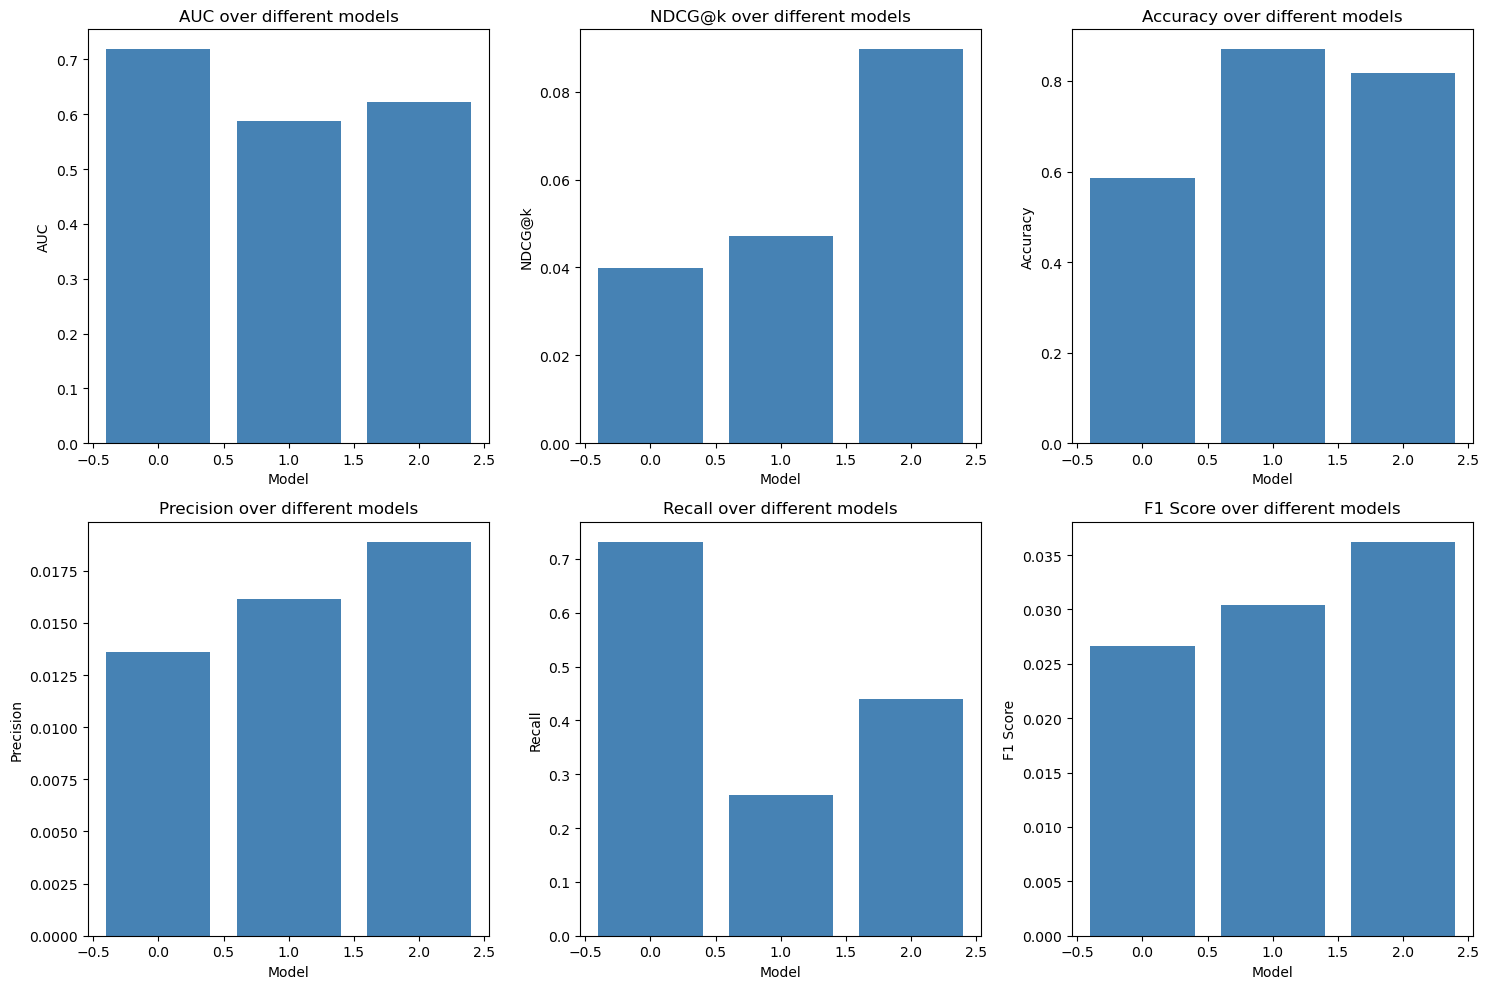

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)

metrics = ['AUC', 'NDCG@k', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes for easier iteration

# Plot each metric in a separate subplot
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    ax.bar(results_df.index, results_df[metric], color='steelblue')
    ax.set_xlabel('Model')
    ax.set_ylabel(metrics[idx])
    ax.set_title(f'{metrics[idx]} over different models')

plt.tight_layout()
plt.show()